1. Install packages

In [21]:
import pandas as pd
import numpy as np
import requests

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

2. Load seperate datasets and merge 

In [4]:
ratings = pd.read_csv("/Users/brittanycity/Documents/GitHub/movie_recommender/data/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [62]:
movies = pd.read_csv("/Users/brittanycity/Documents/GitHub/movie_recommender/data/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [57]:
movie_rating = pd.merge(ratings, movies, on='movieId')
movie_rating.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


3. Exploratory Data Analysis

In [11]:
#average rating of each movie
movie_rating.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [13]:
#number of rating for a movie
movie_rating.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [14]:
#create df with mean ratings
rating_mean = pd.DataFrame(movie_rating.groupby('title')['rating'].mean())

In [17]:
#add number of ratings to mean ratings df
rating_mean['rating_counts'] = pd.DataFrame(movie_rating.groupby('title')['rating'].count())

In [19]:
rating_mean.head()

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


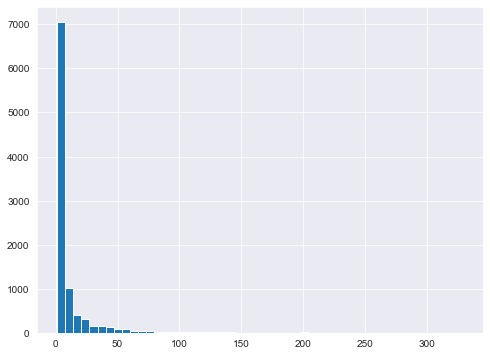

In [22]:
#histogram for the number of ratings
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
rating_mean['rating_counts'].hist(bins=50);

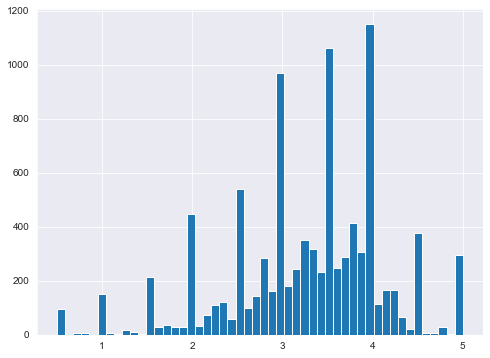

In [24]:
#histogram of avg ratings
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
rating_mean['rating'].hist(bins=50);

4. Find Similarities Between Toy Story and other movies

In [28]:
#matrix of movie titles and corresponding user ratings
user_movie_rating = movie_rating.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#user ratings for "Toy Story (1995)" 
toy_story_ratings = user_movie_rating['Toy Story (1995)']
toy_story_ratings.head() #pandas series

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    4.0
Name: Toy Story (1995), dtype: float64

In [49]:
#find the correlation between the user ratings for the "Toy Story (1995)" and all the other movies
movies_like_toy_story = user_movie_rating.corrwith(toy_story_ratings)

corr_toy_story = pd.DataFrame(movies_like_toy_story, columns=['Correlation'])
corr_toy_story.dropna(inplace=True)
corr_toy_story.sort_values('Correlation', ascending=False).head(10)

/Users/brittanycity/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/brittanycity/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
Land Before Time III: The Time of the Great Giving (1995),1.0
Faster Pussycat! Kill! Kill! (1965),1.0
Amen. (2002),1.0
"Machine Girl, The (Kataude mashin gâru) (2008)",1.0
Waydowntown (2000),1.0
Brigadoon (1954),1.0
Project X (1987),1.0
Imitation of Life (1959),1.0
Terminal Velocity (1994),1.0


In [50]:
#add rating counts as criteria to help find correlated movies with at least 50 ratings
corr_toy_story = corr_toy_story.join(rating_mean['rating_counts'])
corr_toy_story[corr_toy_story['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Toy Story (1995),1.000000,215
Toy Story 2 (1999),0.699211,97
Arachnophobia (1990),0.652424,53
"Incredibles, The (2004)",0.643301,125
Finding Nemo (2003),0.618701,141


5. Find Similarities Between Titanic and other movies

In [63]:
#user ratings for "Clueless (1995)" 
titanic_ratings = user_movie_rating['Titanic (1997)']
titanic_ratings.head() #pandas series

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Titanic (1997), dtype: float64

In [64]:
#find the correlation between the user ratings for the "Toy Story (1995)" and all the other movies
movies_like_titanic = user_movie_rating.corrwith(titanic_ratings)

corr_titanic = pd.DataFrame(movies_like_titanic, columns=['Correlation'])
corr_titanic.dropna(inplace=True)
corr_titanic.sort_values('Correlation', ascending=False).head(10)

/Users/brittanycity/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/brittanycity/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
Ip Man 2 (2010),1.0
"Howling, The (1980)",1.0
Hachiko: A Dog's Story (a.k.a. Hachi: A Dog's Tale) (2009),1.0
Thesis (Tesis) (1996),1.0
"Hand That Rocks the Cradle, The (1992)",1.0
The Odyssey (1997),1.0
"Hard Way, The (1991)",1.0
The Longest Ride (2015),1.0
The Last Witch Hunter (2015),1.0


In [68]:
#add rating counts as criteria to help find correlated movies with at least 50 ratings
#corr_titanic = corr_titanic.join(rating_mean['rating_counts'])
corr_titanic[corr_titanic['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Titanic (1997),1.000000,140
Dances with Wolves (1990),0.683611,164
Star Trek: Generations (1994),0.616660,108
Ghost (1990),0.463891,115
Four Weddings and a Funeral (1994),0.429049,103
